In [1]:
import pandas as pd
import numpy as np
import re
import dataframe_image as dfi
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib notebook

from scipy.stats import mannwhitneyu

In [2]:
df = pd.read_csv('../data/bayut/cleaned/ready_flats_valuation.csv')

In [3]:
# Calculate first and third quartile
first_quartile = df['price'].describe()['25%']
third_quartile = df['price'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = df[(df['price'] > (first_quartile - 3 * iqr)) &
            (df['price'] < (third_quartile + 3 * iqr))]

In [4]:
g_value = data[(data['valuation']=='great value') | (data['valuation']=='good value')]
h_overvalued = data[(data['valuation']=='highly overvalued')]

U1, p = mannwhitneyu(g_value['price'], h_overvalued['price'], method='auto', nan_policy='propagate')
format(p, '.3f')

'0.000'

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5332\2321369761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'] / 1000


<IPython.core.display.Javascript object>


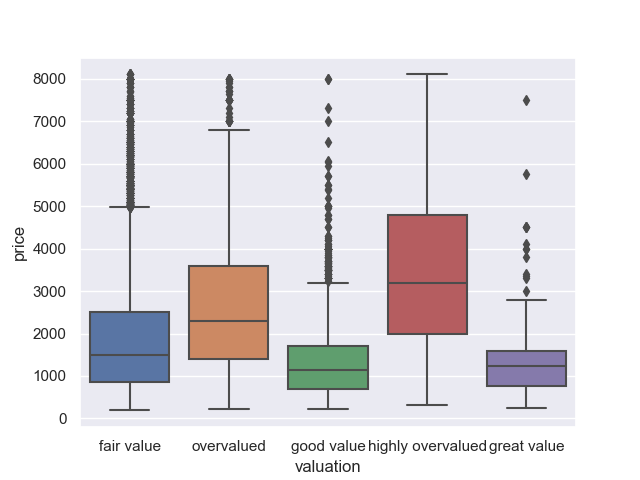

<AxesSubplot:xlabel='valuation', ylabel='price'>

In [11]:
data['price'] = data['price'] / 1000
sns.boxplot(x='valuation', y='price', data=data)

In [6]:
g_value['price'] = g_value['price'] / 1000
h_overvalued['price'] = h_overvalued['price'] / 1000

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5332\2426273775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_value['price'] = g_value['price'] / 1000
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5332\2426273775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_overvalued['price'] = h_overvalued['price'] / 1000


In [7]:
g_value.describe()

,Unnamed: 0,price,beds,baths,surface,lat,long,completion_year,floor,price_sqf,...,distressed,investment,tenanted,vacant,metro,furnished,condition,luxury,median_sqf,diff_percent
count,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,63.000000,2362.000000,...,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000
mean,13069.651990,1357.591246,1.641829,2.377223,1383.264183,25.112501,55.208033,734.628281,11.746032,953.448265,...,0.009314,0.143099,0.119390,0.142252,0.025402,0.131668,0.089754,0.044030,1600.212213,-39.842533
std,7521.788303,915.793422,0.854266,0.975102,609.740744,0.058152,0.070592,967.518596,15.903913,360.014230,...,0.096080,0.350248,0.324316,0.349383,0.157377,0.338201,0.285890,0.205206,618.551833,7.674364
min,22.000000,230.000000,0.000000,0.000000,384.000000,24.862205,55.050665,0.000000,1.000000,193.810455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,481.077614,-79.854178
25%,6590.000000,700.000000,1.000000,2.000000,946.500000,25.068288,55.142411,0.000000,2.000000,715.633310,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1305.237542,-44.411646
50%,12828.500000,1170.000000,2.000000,2.000000,1291.500000,25.088699,55.204947,0.000000,5.000000,920.667854,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1524.779462,-37.930793
75%,19565.750000,1700.000000,2.000000,3.000000,1652.000000,25.186794,55.272023,2007.000000,13.500000,1117.534216,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1938.837297,-33.727112
max,27131.000000,8000.000000,4.000000,6.000000,3993.000000,25.257749,55.440595,2023.000000,71.000000,2840.909091,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,-30.008530


In [8]:
h_overvalued.describe()

,Unnamed: 0,price,beds,baths,surface,lat,long,completion_year,floor,price_sqf,...,distressed,investment,tenanted,vacant,metro,furnished,condition,luxury,median_sqf,diff_percent
count,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,29.000000,1634.000000,...,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000
mean,13891.264382,3476.054138,1.683599,2.452264,1231.883011,25.110577,55.192489,222.796818,14.241379,2763.239250,...,0.000612,0.074663,0.056916,0.116891,0.001224,0.165851,0.118115,0.058140,1499.693920,84.380721
std,7865.896581,1917.510332,0.824985,0.982011,546.480280,0.063786,0.073962,631.447422,14.141265,998.385178,...,0.024739,0.262928,0.231752,0.321389,0.034975,0.372060,0.322843,0.234079,460.339409,41.846523
min,27.000000,319.999000,0.000000,0.000000,96.000000,24.862205,54.949708,0.000000,1.000000,707.671958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,423.260423,50.044348
25%,7053.500000,2000.000000,1.000000,2.000000,818.000000,25.072222,55.136245,0.000000,3.000000,2227.753715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1305.237542,58.831723
50%,14400.000000,3199.400000,2.000000,2.000000,1139.000000,25.086438,55.147372,0.000000,9.000000,2638.647648,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1525.266574,69.724441
75%,20733.500000,4800.000000,2.000000,3.000000,1602.000000,25.184561,55.271766,0.000000,21.000000,3469.140087,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1750.445455,94.169324
max,27102.000000,8100.000000,4.000000,6.000000,3850.000000,25.240309,55.423065,2025.000000,50.000000,6658.278894,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3003.509991,856.521739


In [9]:
ho = df[(df['valuation']=='highly overvalued')]
ho['price'] = ho['price'] / 1000
ho.describe()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5332\567179308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ho['price'] = ho['price'] / 1000


,Unnamed: 0,price,beds,baths,surface,lat,long,completion_year,floor,price_sqf,...,distressed,investment,tenanted,vacant,metro,furnished,condition,luxury,median_sqf,diff_percent
count,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,31.000000,1823.000000,...,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000
mean,13912.315963,4391.848988,1.792649,2.583653,1354.283511,25.115465,55.194746,229.492046,16.129032,3013.982074,...,0.000549,0.069665,0.053209,0.113001,0.001097,0.158530,0.112452,0.055952,1559.686893,92.510109
std,7932.779600,3687.318713,0.870804,1.042192,654.142730,0.064545,0.073476,639.651072,17.042578,1359.634874,...,0.023421,0.254652,0.224512,0.316680,0.033113,0.365337,0.316008,0.229892,510.795195,56.940241
min,27.000000,319.999000,0.000000,0.000000,96.000000,24.862205,54.949708,0.000000,1.000000,707.671958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,423.260423,50.003882
25%,7069.000000,2199.495000,1.000000,2.000000,840.500000,25.072222,55.136245,0.000000,3.000000,2316.433566,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1337.625228,59.482485
50%,14440.000000,3528.000000,2.000000,2.000000,1181.000000,25.086517,55.148481,0.000000,9.000000,2800.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1528.255528,71.915513
75%,20773.000000,5300.000000,2.000000,3.000000,1758.000000,25.188306,55.271766,0.000000,21.500000,3769.573148,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1872.074883,105.521513
max,27102.000000,35000.000000,4.000000,6.000000,3850.000000,25.240309,55.423065,2025.000000,71.000000,13415.101571,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4835.988504,856.521739
